# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

In [ ]:
link = "https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/compresive_strength_concrete.csv"

In [ ]:
ds = pd.read_csv(link)
ds

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
ds.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
ds = ds.sample(frac=1)
print(len(ds))

1030


In [ ]:
50/ds.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
967,0.322997,0.272628,inf,0.258665,5.494505,0.057000,0.057624,1.785714,2.101723
1020,0.173370,0.413223,inf,0.281849,7.142857,0.055072,0.060277,1.785714,1.186521
496,0.129199,2.500000,0.531915,0.318471,4.310345,0.053305,0.059172,0.892857,0.813537
737,0.210084,inf,inf,0.268817,inf,0.044683,0.063371,1.785714,2.850627
602,0.147493,inf,inf,0.253807,inf,0.051653,0.064020,0.555556,1.421666


In [ ]:
data = ds.loc[:,ds.columns!="Concrete compressive strength(MPa, megapascals) "]
labels = ds.loc[:,ds.columns=="Concrete compressive strength(MPa, megapascals) "]
print(data)
print("---------------------------------------------------")
print(labels)

      Cement (component 1)(kg in a m^3 mixture)  ...  Age (day)
967                                       154.8  ...         28
1020                                      288.4  ...         28
496                                       387.0  ...         56
737                                       238.0  ...         28
602                                       339.0  ...         90
...                                         ...  ...        ...
258                                       212.5  ...        100
421                                       178.0  ...         14
298                                       168.9  ...        100
189                                       233.8  ...          3
477                                       446.0  ...          3

[1030 rows x 8 columns]
---------------------------------------------------
      Concrete compressive strength(MPa, megapascals) 
967                                              23.79
1020                                         

In [ ]:
train_data = data[:515]
train_labels = labels[:515]
val_data = data[515:824]
val_labels = labels[515:824]
test_data = data[824:]
test_labels = labels[824:]

In [ ]:
train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
val_data = (val_data - val_data.mean(axis=0)) / val_data.std(axis=0)
test_data = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)

In [ ]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))
print(len(val_data))
print(len(val_labels))
print(train_data.shape)

515
515
206
206
309
309
(515, 8)


In [ ]:
network = models.Sequential()
network.add(layers.Dense(10, activation="relu", kernel_regularizer=regularizers.l2(.001), input_shape=(train_data.shape[1], )))
network.add(layers.Dense(8, activation="relu", kernel_regularizer=regularizers.l2(.001)))
network.add(layers.Dense(6, activation="relu", kernel_regularizer=regularizers.l2(.001)))
network.add(layers.Dense(1))
network.compile(metrics=["mae", "acc"], optimizer="rmsprop", loss="mse")

In [ ]:
history = network.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(val_data, val_labels))

Epoch 1/100
17/17 [==============================] - 1s 18ms/step - loss: 1550.7825 - mae: 35.5711 - acc: 0.0000e+00 - val_loss: 1628.7170 - val_mae: 36.9817 - val_acc: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 1502.0137 - mae: 35.1532 - acc: 0.0000e+00 - val_loss: 1610.8123 - val_mae: 36.7490 - val_acc: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 1420.9377 - mae: 33.8168 - acc: 0.0000e+00 - val_loss: 1590.3004 - val_mae: 36.4793 - val_acc: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 1464.0474 - mae: 34.5058 - acc: 0.0000e+00 - val_loss: 1567.9731 - val_mae: 36.1832 - val_acc: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 1350.9267 - mae: 33.0862 - acc: 0.0000e+00 - val_loss: 1542.0380 - val_mae: 35.8363 - val_acc: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 1313.1399 - mae: 32.4662 - acc:

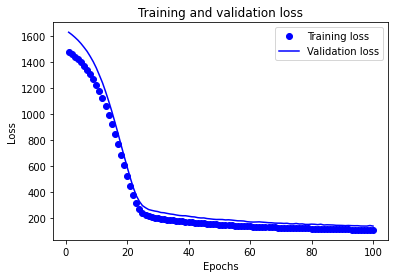

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
result = network.evaluate(train_data, train_labels)

17/17 [==============================] - 0s 1ms/step - loss: 105.5211 - mae: 8.2433 - acc: 0.0000e+00


In [ ]:
result

[105.52110290527344, 8.24329948425293, 0.0]